# `005-image-ops`

Task: perform broadcast and reduction operations on a tensor representing a batch of color images

# Setup

In [1]:
from fastai.vision.all import *

# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
matplotlib.rc('image', cmap='Greys')

Download dataset.

In [2]:
path = untar_data(URLs.PETS) / "images"

Make a stable order for the images: first sort, then randomize using a known seed.

In [3]:
set_seed(333)
image_files = get_image_files(path).sorted().shuffle()

Define how we're going to split the data into a training and validation set.

In [4]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)

In this dataset, cat breeds start with a capital letter, so we can get the label from the filename.

In [5]:
def cat_or_dog(x):
    return 'cat' if x[0].isupper() else 'dog'

def get_y(file_path):
    return cat_or_dog(file_path.name)

Define a standard image-classification `DataBlock`.

In [6]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = get_y,
                   splitter  = splitter,
                   item_tfms = Resize(224))

Override `shuffle_fn` so that the images never actually get shuffled (batch order is consistent).

In [7]:
dataloaders = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

Since we set the `shuffle_fn` to the identity above, the images will always get loaded in the same order, so the first batch will always be the same:

In [8]:
batch = dataloaders.train.one_batch()
images, labels = batch

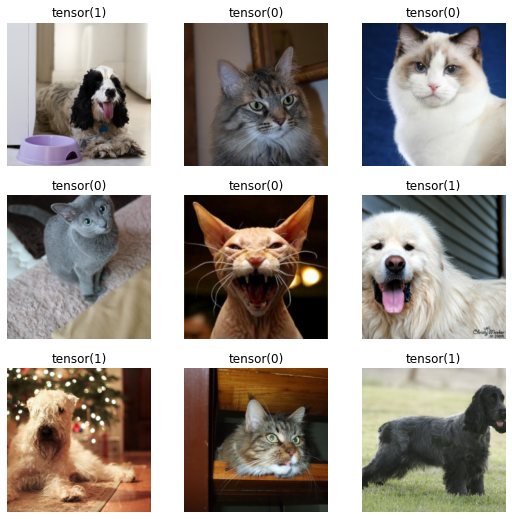

In [9]:
show_image_batch((images, labels))

# Task

Try each of the following:

1. **Run `images.shape`**. What does each number represent?
2. **Run `labels`**. Explain those numbers, with the help of `dataloaders.train.vocab`.
3. **Show the first image in the batch.**
4. **Show the average image (mean along dimension ___)**.
5. **Make the images grayscale**. Show the result.
6. **Invert the color of the images** (e.g., black becomes white). Show the result.
7. **Show only the red color channel**. *it's okay if it's not shown as red.*
8. **Show a 64-pixel-square cutout of the image, starting at 64 pixels in from the top and left.**
9. **Show the result of applying `Rotate` on the images.** Set `max_deg` to 45 and `p` to 1.0.

## Problem 1

In [10]:
images.shape

(9, 3, 224, 224)

9 represents the number of images in the batch. 3 represents the size of the color tensor within each image (each index containing an RBG value). The last two numbers, both of which are 224, represent the height and width of the images in the batch.

## Problem 2

In [11]:
labels

TensorCategory([1, 0, 0, 0, 0, 1, 1, 0, 1], device='cuda:0')

In [12]:
dataloaders.train.vocab

['cat', 'dog']

The list of numbers within the tensor represents the label of each image (in binary). 0 signifies that the image was classified as a cat, and 1 signifies that the image was classified as a dog. On a deeper level, using `dataloaders.train.vocab`, 0 represents the index of the `vocab` array that contains the 'cat' label, and 1 represents the index that refers to the 'dog' label.

## Problem 3

<AxesSubplot:>

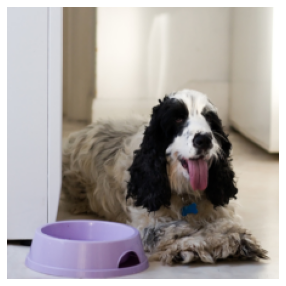

In [13]:
show_image(images[0])

## Problem 4

<AxesSubplot:>

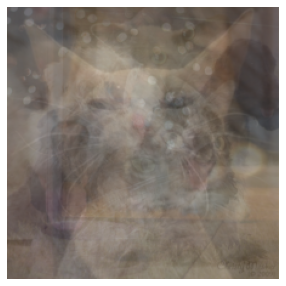

In [14]:
show_image(images.mean(dim=0))

## Problem 5

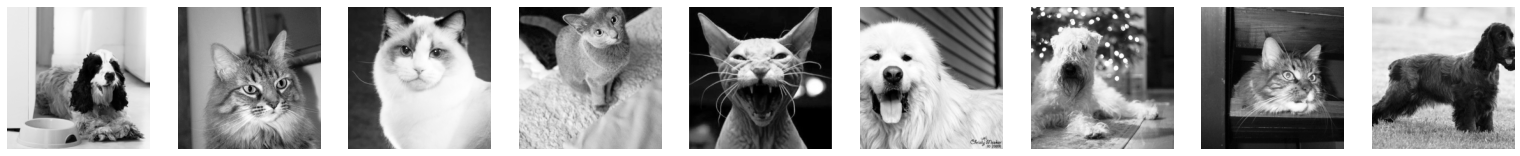

In [15]:
show_images(1 - images.mean(dim=1))

## Problem 6

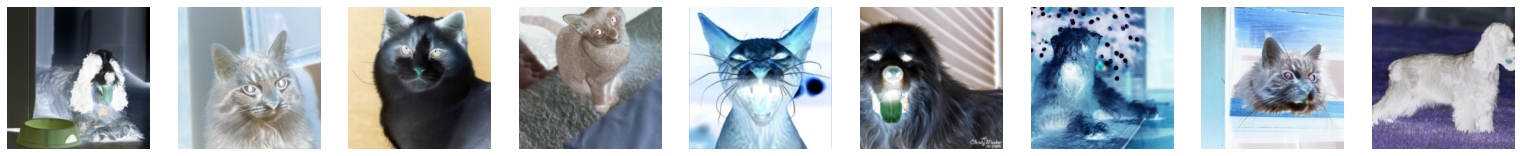

In [16]:
show_images(1 - images)

## Problem 7

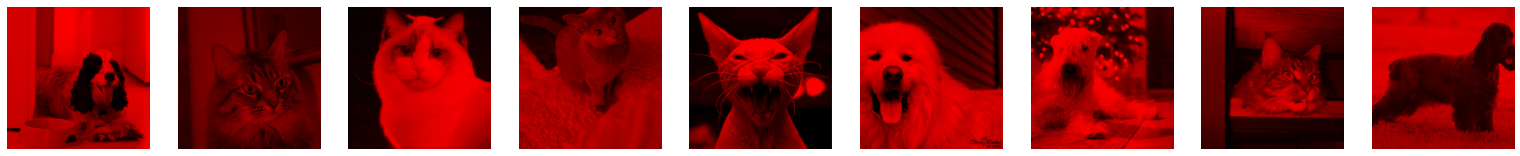

In [21]:
red_filter = Tensor([1, 0, 0])[None, :, None, None]
images_copy = to_cpu(images.clone())

show_images(images_copy * red_filter)

## Problem 8

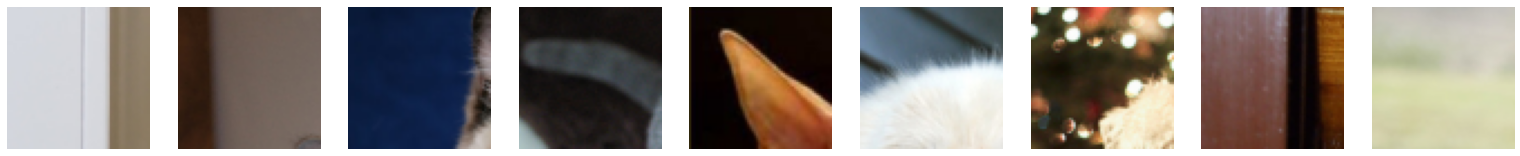

In [22]:
show_images(images[:, :, 0:64, 0:64])

## Problem 9

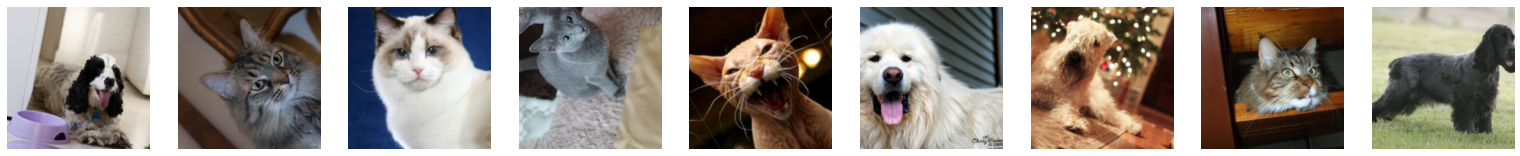

In [23]:
show_images(Rotate(max_deg=45, p=1.0)(images))